In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

The dataset has 614 rows and 13 columns.

In [4]:
columns=df.columns
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset has total 614 data rows and 13 columns.

The data types in the dataset - Integer, Float and object/string.

The columns Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area and Loan_Status has only 614 rows in the dataset, other columns are having missing values.

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The dataset has data types of integer ,float and object data types.

Integer - ApplicantIncome

Float - CoapplicantIncome,LoanAmount,Loan_Amount_Term and Credit_History

Object - Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area and Loan_Status.

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Null values present in the dataset. The columns Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term and Credit_History has missing values.


In [8]:
#Checking which one is most frequently occuring in Gender,Married,Dependents and Self_Employed.
print(df['Gender'].mode())
print(df['Married'].mode())
print(df['Dependents'].mode())
print(df['Self_Employed'].mode())

0    Male
dtype: object
0    Yes
dtype: object
0    0
dtype: object
0    No
dtype: object


In [9]:
#Replacing the null values in Gender,Married,Dependents and Self_Employed using mode.
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [10]:
#Replacing the null values in LoanAmount,Loan_Amount_Term and Credit_History using mean.
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

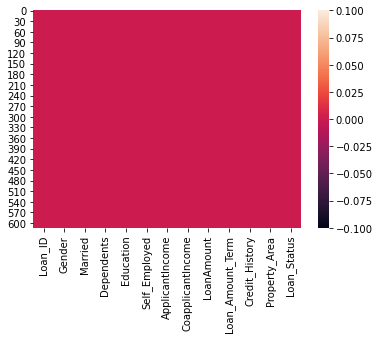

In [12]:
sns.heatmap(df.isnull())

No null value present now.

In [13]:
#Statistics summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


All the column counts are 614.

The mean is greater than median in ApplicantIncome,CoapplicantIncome and LoanAmount.

There is huge difference between min and 25th percentile in ApplicantIncome,LoanAmount and Loan_Amount_Term.

There is huge difference between 75th percentile and Max in ApplicantIncome,CoapplicantIncome,LoanAmount and Loan_Amount_term.

Outliers will be present.

In [14]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


<AxesSubplot:>

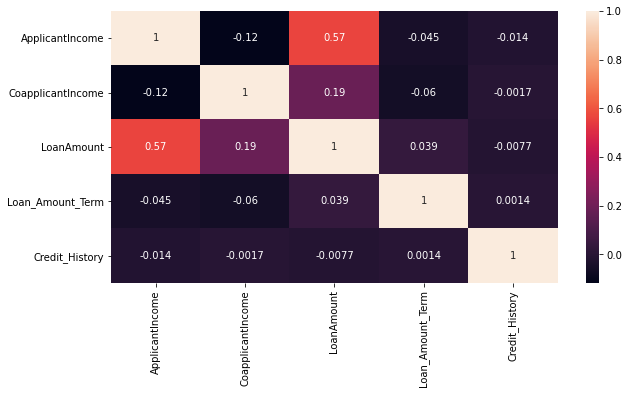

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

LoanAmount and ApplicantIncome is positively correlated.

LoanAmount and CoapplicantIncome is positively correlated.

ApplicantIncome and CoapplicantIncome is negatively correlated.

Loan_Amount_term and ApplicantIncome is negatively correlated.

Loan_Amount_Term and LoanAmount is positively correlated.

Data Visualization

In [16]:
cat=df[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]
con=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

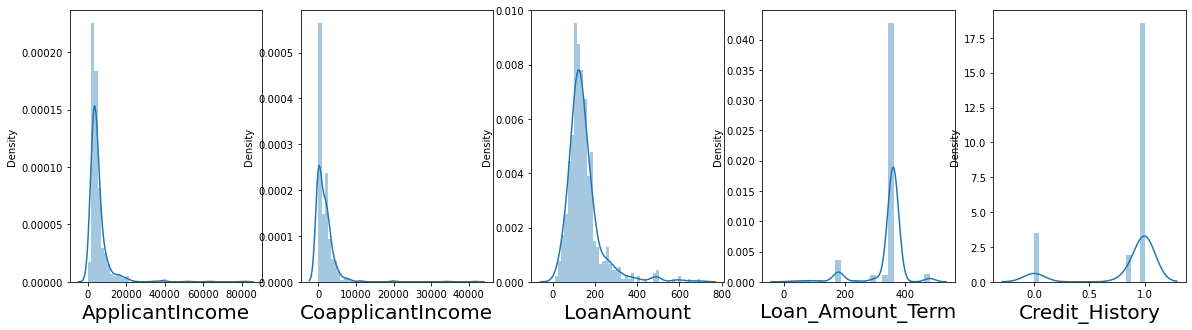

In [17]:
plt.figure(figsize=(20,5))
plotnumber=1

for i in con:
    if plotnumber<=5:
        ax=plt.subplot(1,5,plotnumber)
        sns.distplot(con[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [18]:
#Checking Skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [19]:
#Removing Skewness
df['ApplicantIncome']=np.log2(df['ApplicantIncome'])
df['CoapplicantIncome']=np.sqrt(df['CoapplicantIncome'])
df['LoanAmount']=np.sqrt(df['LoanAmount'])

In [20]:
df.skew()

ApplicantIncome      0.479580
CoapplicantIncome    0.979561
LoanAmount           1.314162
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

Skewness is looking good.

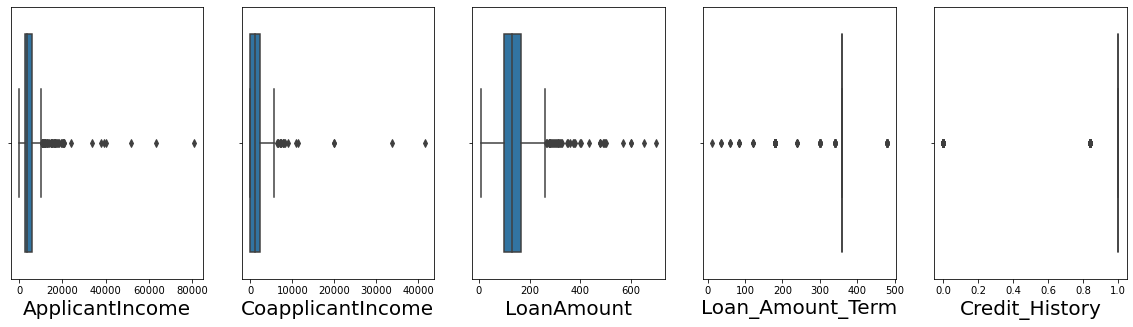

In [21]:
#Checking outliers
plt.figure(figsize=(20,5))
plotnumber=1

for i in con:
    if plotnumber<=5:
        ax=plt.subplot(1,5,plotnumber)
        sns.boxplot(con[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

Outliers are present in ApplicantIncome,CoapplicantIncome,LoanAmount and Loan_Amount_Term.

In [22]:
cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


Male      502
Female    112
Name: Gender, dtype: int64

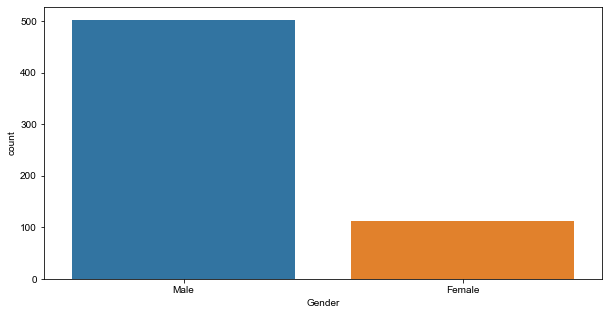

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(df['Gender'])
sns.set(style='whitegrid')
df['Gender'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

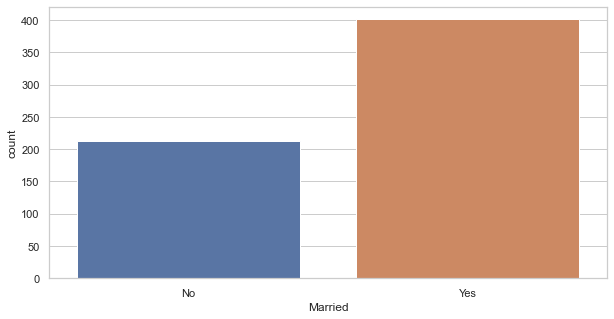

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df['Married'])
df['Married'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

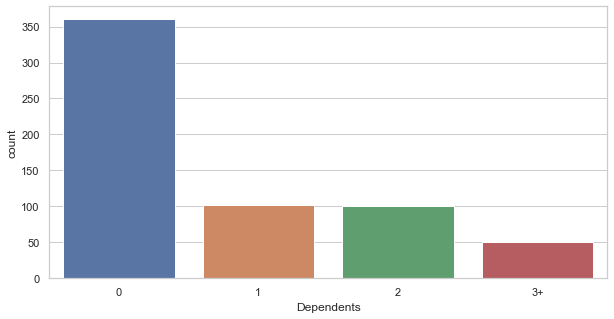

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(df['Dependents'])
df['Dependents'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

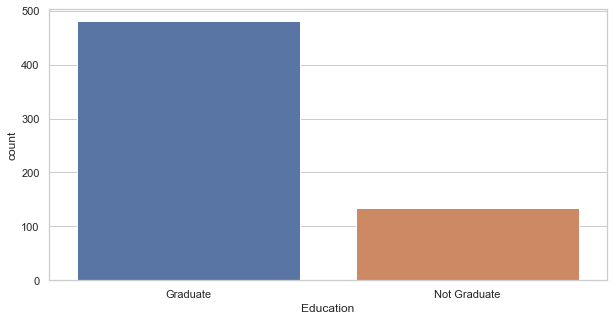

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df['Education'])
df['Education'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

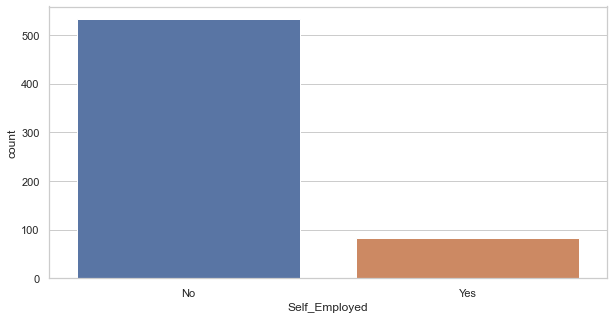

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(df['Self_Employed'])
df['Self_Employed'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

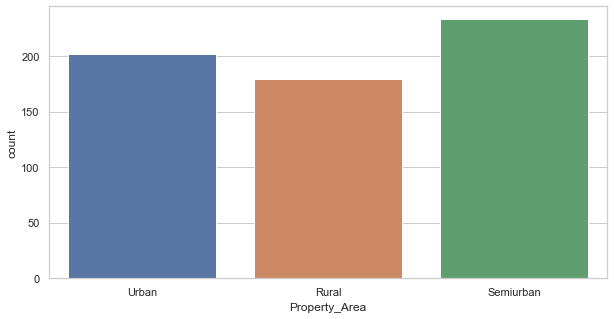

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(df['Property_Area'])
df['Property_Area'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

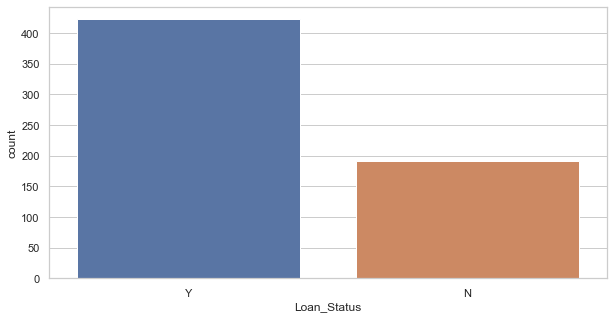

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(df['Loan_Status'])
df['Loan_Status'].value_counts()

Text(0.5, 1.0, 'Gender VS Loan Status')

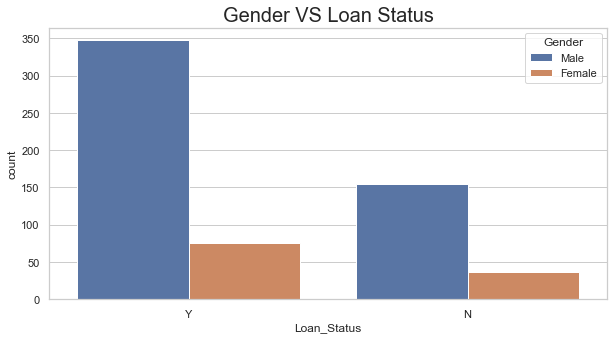

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='Loan_Status',hue='Gender',data=df)
plt.title('Gender VS Loan Status',fontsize=20)

Text(0.5, 1.0, 'Property Area VS Loan Status')

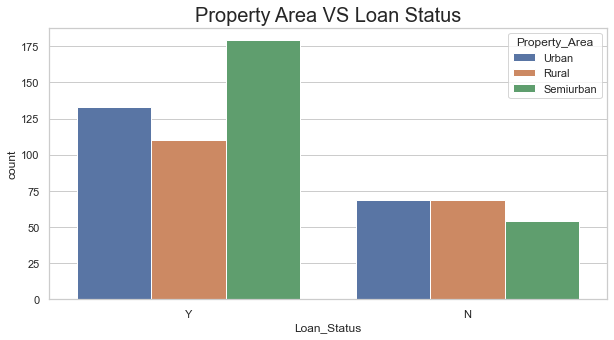

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='Loan_Status',hue='Property_Area',data=df)
plt.title('Property Area VS Loan Status',fontsize=20)

Loan approval is getting to those from Semiurban area compared to Urban area and Rural area.

Text(0.5, 1.0, 'Education VS Loan Status')

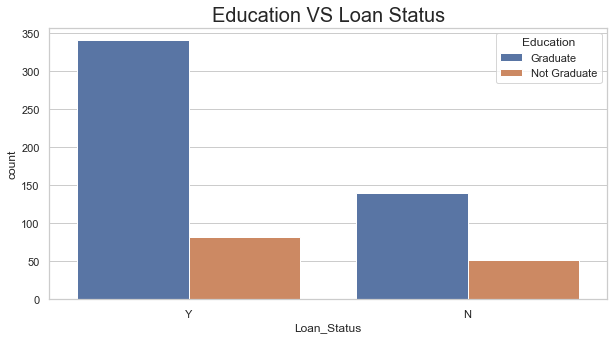

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='Loan_Status',hue='Education',data=df)
plt.title('Education VS Loan Status',fontsize=20)

Graduated are getting approval than the not graduated ones.

Text(0.5, 1.0, 'Self Employed VS Loan Status')

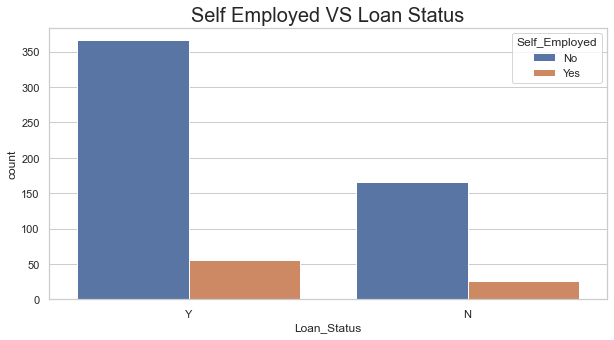

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='Loan_Status',hue='Self_Employed',data=df)
plt.title('Self Employed VS Loan Status',fontsize=20)

Text(0.5, 1.0, 'Dependents VS Loan Status')

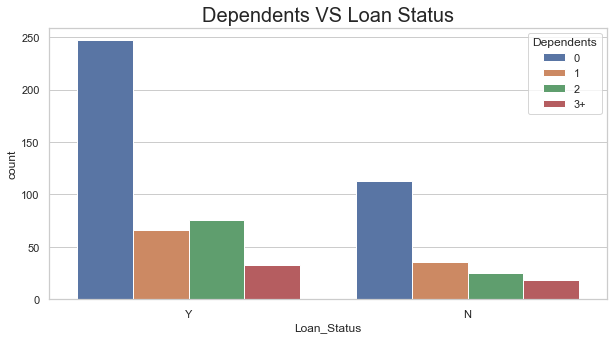

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='Loan_Status',hue='Dependents',data=df)
plt.title('Dependents VS Loan Status',fontsize=20)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

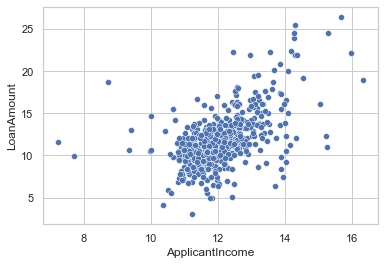

In [35]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=df)

Loan Amount is increasing with the increase in Applicant income.

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

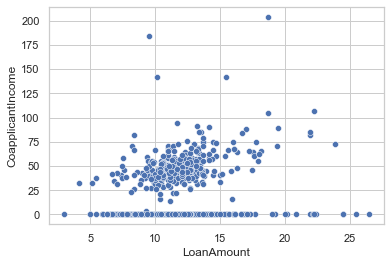

In [36]:
sns.scatterplot('LoanAmount','CoapplicantIncome',data=df)

Coapplicant income and loan amount is positively correlated.

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

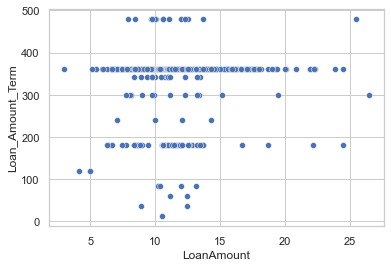

In [37]:
sns.scatterplot('LoanAmount','Loan_Amount_Term',data=df)

<AxesSubplot:xlabel='LoanAmount', ylabel='Property_Area'>

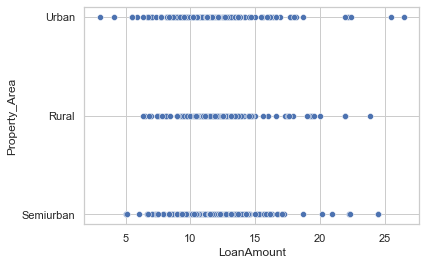

In [38]:
sns.scatterplot('LoanAmount','Property_Area',data=df)

For Urban area Loan amount is ranging from 3 to 26.

For Rural area Loan amount is ranging from 7 to 24.

For Semiurban area Loan amount is ranging from 5 to 25.

<AxesSubplot:xlabel='LoanAmount', ylabel='Education'>

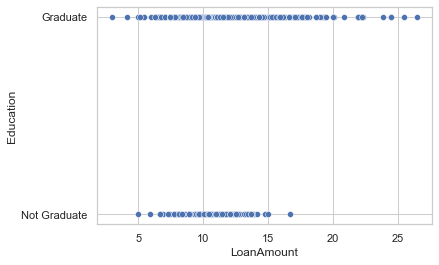

In [39]:
sns.scatterplot('LoanAmount','Education',data=df)

For Graduated applicant Loan amount ranging from 3 to 26.

For Not Graduate applicant Loan amount ranging from 5 to 17.

<AxesSubplot:xlabel='LoanAmount', ylabel='Credit_History'>

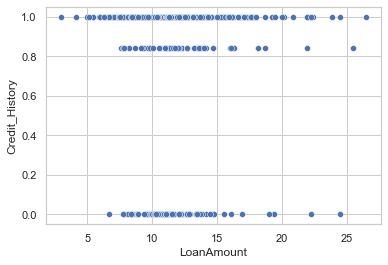

In [40]:
sns.scatterplot('LoanAmount','Credit_History',data=df)

For Applicant with credit history 1, Loan Amount ranging from 3 to 26.

For Applicant wih credit history 0, Loan Amount ranging from 7 to 24.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

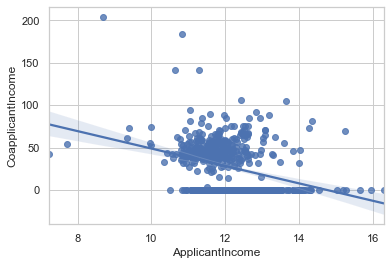

In [41]:
sns.regplot('ApplicantIncome','CoapplicantIncome',data=df)

The Coapplicant income and Applicant income has a Negative linear relation.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

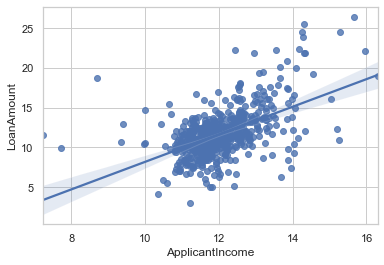

In [42]:
sns.regplot('ApplicantIncome','LoanAmount',data=df)

Applicant Income and Loan Amount has a Positive linear relation.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Amount_Term'>

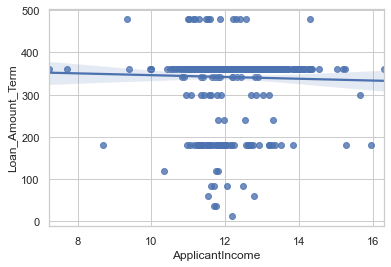

In [43]:
sns.regplot('ApplicantIncome','Loan_Amount_Term',data=df)

Applicant income and Loan amount term has weak relation.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Credit_History'>

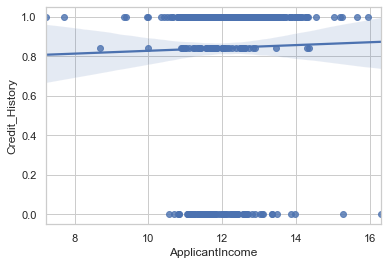

In [44]:
sns.regplot('ApplicantIncome','Credit_History',data=df)

Applicant income and Credit history has a weak relation.

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

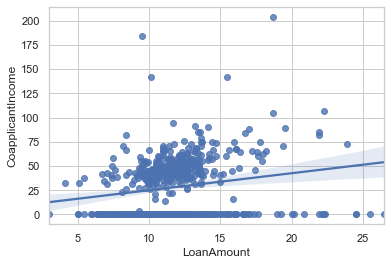

In [45]:
sns.regplot('LoanAmount','CoapplicantIncome',data=df)

Loan Amount and Coapplicant income has a positive linear relation.

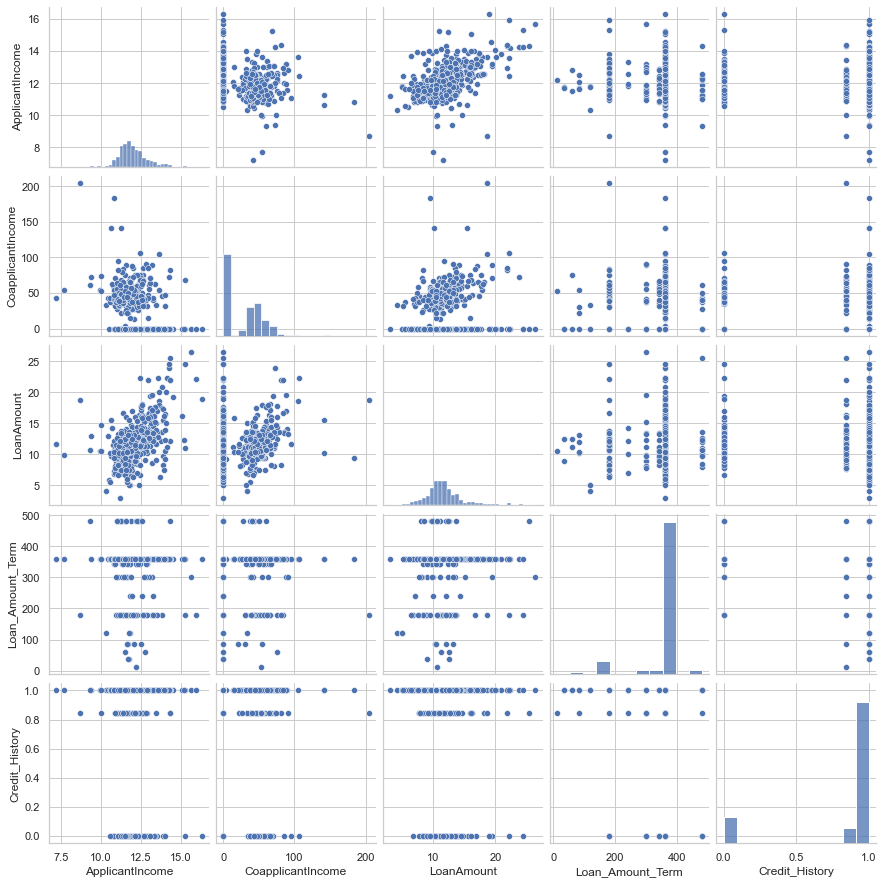

In [46]:
sns.pairplot(df)

In [47]:
cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [48]:
#Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
for i in df:
    if df[i].dtypes=='object':
        df[i]=Le.fit_transform(df[i])

In [49]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,12.513974,0.000000,12.100089,360.0,1.0,2,1
1,1,1,1,1,0,0,12.162077,38.832976,11.313708,360.0,1.0,0,0
2,2,1,1,0,0,1,11.550747,0.000000,8.124038,360.0,1.0,2,1
3,3,1,1,0,1,0,11.334832,48.559242,10.954451,360.0,1.0,2,1
4,4,1,0,0,0,0,12.550747,0.000000,11.874342,360.0,1.0,2,1


In [50]:
#Loan_ID is not needed ,so removing
df=df.drop('Loan_ID',axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,12.513974,0.000000,12.100089,360.0,1.0,2,1
1,1,1,1,0,0,12.162077,38.832976,11.313708,360.0,1.0,0,0
2,1,1,0,0,1,11.550747,0.000000,8.124038,360.0,1.0,2,1
3,1,1,0,1,0,11.334832,48.559242,10.954451,360.0,1.0,2,1
4,1,0,0,0,0,12.550747,0.000000,11.874342,360.0,1.0,2,1


<AxesSubplot:>

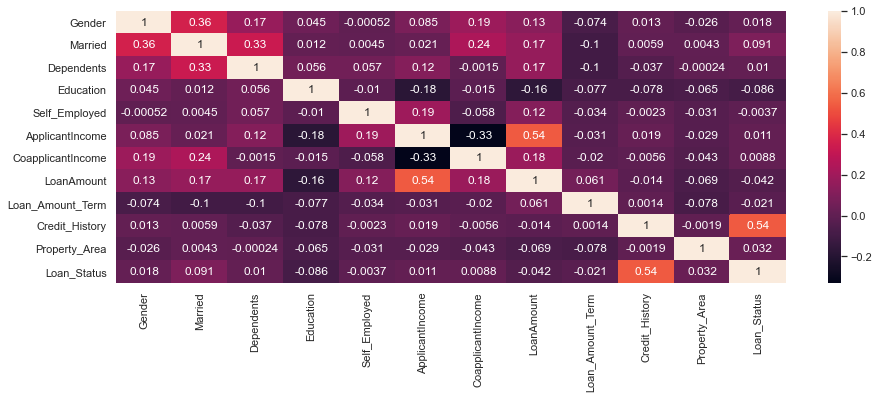

In [51]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

The Loan_Status is highly positive correlated to credit history.

Loan_Status is Positively correlated to Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome and Property_Area.

Loan_Status is Negatively correlated to Education,Self_Employed,Loan_Amount and Loan_Amount_Term.

In [52]:
#Finding outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 14,  68,  94, 130, 133, 155, 155, 171, 171, 177, 183, 185, 216,
       242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417, 443, 468,
       487, 495, 497, 506, 523, 546, 561, 575, 581, 585, 600, 600, 604],
      dtype=int64), array([8, 8, 8, 7, 8, 5, 7, 5, 7, 7, 5, 5, 5, 8, 8, 7, 7, 8, 5, 7, 7, 6,
       5, 6, 5, 5, 7, 8, 8, 7, 7, 8, 7, 8, 6, 8, 5, 6, 7], dtype=int64))


In [53]:
#Removing the outliers
dfnew=df[(z<3).all(axis=1)]
print('dfnew.shape = ',dfnew.shape)
df=dfnew

dfnew.shape =  (579, 12)


In [54]:
dataloss=((614-579)/614)*100
dataloss

5.700325732899023

5.70 Data loss After outliers removed.

In [55]:
# Separating dependent and independent variables

X=df.drop('Loan_Status',axis=1)
Y=df['Loan_Status']
print(X.shape)
print(Y.shape)

(579, 11)
(579,)


In [56]:
Y.value_counts()

1    400
0    179
Name: Loan_Status, dtype: int64

The output variable is imbalanced.need to balance.

In [57]:
#concatenate training data back together
from sklearn.utils import resample

X=pd.concat([X,Y],axis=1)

N=X[X.Loan_Status==0]
Y=X[X.Loan_Status==1]

#Upsampling
up=resample(N,replace=True, n_samples=len(Y), random_state=25)

#Combine majority and minority
up=pd.concat([Y,up])

In [58]:
up.Loan_Status.value_counts()

0    400
1    400
Name: Loan_Status, dtype: int64

Balanced the output variable.

In [59]:
X=up.drop('Loan_Status',axis=1)
Y=up['Loan_Status']
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,12.513974,0.000000,12.100089,360.0,1.0,2
2,1,1,0,0,1,11.550747,0.000000,8.124038,360.0,1.0,2
3,1,1,0,1,0,11.334832,48.559242,10.954451,360.0,1.0,2
4,1,0,0,0,0,12.550747,0.000000,11.874342,360.0,1.0,2
5,1,1,2,0,1,12.403278,64.776539,16.340135,360.0,1.0,2


In [60]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
vif['Features']=X.columns
vif

,VIF,Features
0,7.117405,Gender
1,3.633549,Married
2,1.829116,Dependents
3,1.412495,Education
4,1.228614,Self_Employed
5,84.268201,ApplicantIncome
6,2.679232,CoapplicantIncome
7,36.105464,LoanAmount
8,36.104949,Loan_Amount_Term
9,4.663488,Credit_History


Multicollinearity between LoanAmount and Loan_Amount_Term.

In [61]:
#Dropping LoanAmount.
X=X.drop(['LoanAmount'],axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,12.513974,0.000000,360.0,1.0,2
2,1,1,0,0,1,11.550747,0.000000,360.0,1.0,2
3,1,1,0,1,0,11.334832,48.559242,360.0,1.0,2
4,1,0,0,0,0,12.550747,0.000000,360.0,1.0,2
5,1,1,2,0,1,12.403278,64.776539,360.0,1.0,2


In [62]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_scale=scale.fit_transform(X)
X_scale

array([[ 0.45256964, -1.27395087, -0.72942593, ...,  0.21541089,
         0.57067506,  1.24833613],
       [ 0.45256964,  0.78495963, -0.72942593, ...,  0.21541089,
         0.57067506,  1.24833613],
       [ 0.45256964,  0.78495963, -0.72942593, ...,  0.21541089,
         0.57067506,  1.24833613],
       ...,
       [ 0.45256964, -1.27395087, -0.72942593, ...,  0.21541089,
         0.57067506, -1.26403847],
       [ 0.45256964, -1.27395087, -0.72942593, ...,  0.21541089,
         0.57067506, -1.26403847],
       [ 0.45256964,  0.78495963, -0.72942593, ...,  0.21541089,
         0.18518989, -0.00785117]])

In [63]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

svc=SVC()
lg=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()

In [64]:
#Train test splitting
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.25,random_state=42)

#SVC
svc.fit(x_train,y_train)
svc.score(x_train,y_train)

0.8316666666666667

In [65]:
predsvc=svc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predsvc))
print('Confusion matrix :',confusion_matrix(y_test,predsvc))
print('Classification report :',classification_report(y_test,predsvc))

Accuracy score : 0.77
Confusion matrix : [[67 35]
 [11 87]]
Classification report :               precision    recall  f1-score   support

           0       0.86      0.66      0.74       102
           1       0.71      0.89      0.79        98

    accuracy                           0.77       200
   macro avg       0.79      0.77      0.77       200
weighted avg       0.79      0.77      0.77       200



In [66]:
#Logistic regression
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.7316666666666667

In [67]:
predlg=lg.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predlg))
print('Confusion matrix :',confusion_matrix(y_test,predlg))
print('Classification report :',classification_report(y_test,predlg))

Accuracy score : 0.695
Confusion matrix : [[55 47]
 [14 84]]
Classification report :               precision    recall  f1-score   support

           0       0.80      0.54      0.64       102
           1       0.64      0.86      0.73        98

    accuracy                           0.69       200
   macro avg       0.72      0.70      0.69       200
weighted avg       0.72      0.69      0.69       200



In [68]:
#KNN
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.845

In [69]:
predknn=knn.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predknn))
print('Confusion matrix :',confusion_matrix(y_test,predknn))
print('Classification report :',classification_report(y_test,predknn))

Accuracy score : 0.76
Confusion matrix : [[68 34]
 [14 84]]
Classification report :               precision    recall  f1-score   support

           0       0.83      0.67      0.74       102
           1       0.71      0.86      0.78        98

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.76      0.76       200



In [70]:
#Decision tree
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

1.0

In [71]:
preddtc=dtc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,preddtc))
print('Confusion matrix :',confusion_matrix(y_test,preddtc))
print('Classification report :',classification_report(y_test,preddtc))

Accuracy score : 0.86
Confusion matrix : [[93  9]
 [19 79]]
Classification report :               precision    recall  f1-score   support

           0       0.83      0.91      0.87       102
           1       0.90      0.81      0.85        98

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [72]:
#Random forest
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

1.0

In [73]:
predrfc=rfc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predrfc))
print('Confusion matrix :',confusion_matrix(y_test,predrfc))
print('Classification report :',classification_report(y_test,predrfc))

Accuracy score : 0.87
Confusion matrix : [[90 12]
 [14 84]]
Classification report :               precision    recall  f1-score   support

           0       0.87      0.88      0.87       102
           1       0.88      0.86      0.87        98

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [74]:
#AdaBoost
ad.fit(x_train,y_train)
ad.score(x_train,y_train)

0.7983333333333333

In [75]:
predad=ad.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predad))
print('Confusion matrix :',confusion_matrix(y_test,predad))
print('Classification report :',classification_report(y_test,predad))

Accuracy score : 0.72
Confusion matrix : [[62 40]
 [16 82]]
Classification report :               precision    recall  f1-score   support

           0       0.79      0.61      0.69       102
           1       0.67      0.84      0.75        98

    accuracy                           0.72       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200



In [76]:
#GradientBoost
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.9266666666666666

In [77]:
predgb=gb.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predgb))
print('Confusion matrix :',confusion_matrix(y_test,predgb))
print('Classification report :',classification_report(y_test,predgb))

Accuracy score : 0.79
Confusion matrix : [[76 26]
 [16 82]]
Classification report :               precision    recall  f1-score   support

           0       0.83      0.75      0.78       102
           1       0.76      0.84      0.80        98

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



Cross Validation

In [78]:
#SVC
score=cross_val_score(svc,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.74375 0.75    0.75    0.71875 0.7125 ]
0.735


In [79]:
#Logistic regression
score=cross_val_score(lg,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.68125 0.675   0.73125 0.6625  0.6875 ]
0.6875000000000001


In [80]:
#KNN
score=cross_val_score(knn,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.75625 0.75    0.7125  0.70625 0.675  ]
0.72


In [81]:
#DTC
score=cross_val_score(dtc,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.85625 0.8125  0.89375 0.84375 0.8625 ]
0.85375


In [82]:
#Random forest
score=cross_val_score(rfc,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.91875 0.88125 0.8875  0.8875  0.86875]
0.8887500000000002


In [83]:
#AdaBoost
score=cross_val_score(ad,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.76875 0.71875 0.7     0.69375 0.75   ]
0.7262500000000001


In [84]:
#GradientBoost
score=cross_val_score(gb,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.81875 0.825   0.83125 0.74375 0.8    ]
0.80375


Hyperparameter Tuning

In [85]:
#SVC
grid_para={'C':[0.1,0.001,1.0,1.5,2,2.8],'gamma':['scale','auto'],'kernel':['linear','poly','rbf','sigmoid'],'tol':[0.5,1,1.5,2,2.5],'random_state':[42,47,52,57]}
grid_search=GridSearchCV(estimator=svc,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1.0, 1.5, 2, 2.8],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [42, 47, 52, 57],
                         'tol': [0.5, 1, 1.5, 2, 2.5]})

In [86]:
best_para=grid_search.best_params_
print(best_para)

{'C': 2, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 42, 'tol': 1}


In [87]:
svc=SVC(C=2,gamma='auto',kernel='rbf',random_state=42,tol=1) 
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predsvc))
print('Confusion matrix',confusion_matrix(y_test,predsvc))
print('Classification report :',classification_report(y_test,predsvc))

Accuracy score : 0.77
Confusion matrix [[69 33]
 [13 85]]
Classification report :               precision    recall  f1-score   support

           0       0.84      0.68      0.75       102
           1       0.72      0.87      0.79        98

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200



In [88]:
#Logistic Regression
grid_para={'penalty':['l1','l2','elasticnet'],'C':[0.1,0.001,1.0,1.5,2.8],'solver':['newton-cg','lbfgs','sag','saga'],'multi_class':['auto','ovr','multinomial'],'max_iter':range(2,20,1)}
grid_search=GridSearchCV(estimator=lg,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.001, 1.0, 1.5, 2.8],
                         'max_iter': range(2, 20),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [89]:
best_para=grid_search.best_params_
print(best_para)

{'C': 0.1, 'max_iter': 2, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}


In [90]:
lg=LogisticRegression(C=0.1,max_iter=2,multi_class='auto',penalty='l1',solver='saga') 
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predlg))
print('Confusion matrix',confusion_matrix(y_test,predlg))
print('Classification report :',classification_report(y_test,predlg))

Accuracy score : 0.67
Confusion matrix [[54 48]
 [18 80]]
Classification report :               precision    recall  f1-score   support

           0       0.75      0.53      0.62       102
           1       0.62      0.82      0.71        98

    accuracy                           0.67       200
   macro avg       0.69      0.67      0.66       200
weighted avg       0.69      0.67      0.66       200



In [91]:
#KNN
grid_para={'algorithm':['auto','ball_tree','kd_tree','brute'],'n_neighbors':range(2,20,1),'weights':['uniform','distance'],'leaf_size':range(1,20,1)}
grid_search=GridSearchCV(estimator=knn,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 20), 'n_neighbors': range(2, 20),
                         'weights': ['uniform', 'distance']})

In [92]:
best_para=grid_search.best_params_
print(best_para)

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 18, 'weights': 'distance'}


In [93]:
knn=KNeighborsClassifier(algorithm='auto',n_neighbors=18,weights='distance',leaf_size=1)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predknn))
print('Confusion matrix :',confusion_matrix(y_test,predknn))
print('Classification report :',classification_report(y_test,predknn))

Accuracy score : 0.85
Confusion matrix : [[89 13]
 [17 81]]
Classification report :               precision    recall  f1-score   support

           0       0.84      0.87      0.86       102
           1       0.86      0.83      0.84        98

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



In [94]:
#DTC
grid_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,20,2),'min_samples_split':range(2,20,2),'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20, 2),
                         'splitter': ['best', 'random']})

In [95]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'gini', 'max_depth': 17, 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}


In [96]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=17,max_features='auto',min_samples_split=2,splitter='best')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,preddtc))
print('Confusion matrix :',confusion_matrix(y_test,preddtc))
print('Classification report :',classification_report(y_test,preddtc))

Accuracy score : 0.825
Confusion matrix : [[86 16]
 [19 79]]
Classification report :               precision    recall  f1-score   support

           0       0.82      0.84      0.83       102
           1       0.83      0.81      0.82        98

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



In [97]:
#Random forest
grid_para={'criterion':['gini','entropy'],'min_samples_split':range(1,10,1),'bootstrap':[True,False],'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=rfc,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_split': range(1, 10)})

In [98]:
best_para=grid_search.best_params_
print(best_para)

{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 3}


In [99]:
rfc=RandomForestClassifier(criterion='entropy',min_samples_split=3,bootstrap=True,max_features='auto')
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predrfc))
print('Confusion matrix :',confusion_matrix(y_test,predrfc))
print('Classification report :',classification_report(y_test,predrfc))

Accuracy score : 0.885
Confusion matrix : [[88 14]
 [ 9 89]]
Classification report :               precision    recall  f1-score   support

           0       0.91      0.86      0.88       102
           1       0.86      0.91      0.89        98

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



In [100]:
#AdaBoost
grid_para={'base_estimator':[svc,dtc,rfc],'n_estimators':[50,60,70],'learning_rate':[0.001,0.01,0.1,1.0,1.5],'algorithm':['SAMME','SAMME.R']}
grid_search=GridSearchCV(estimator=ad,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [SVC(C=2, gamma='auto',
                                                random_state=42, tol=1),
                                            DecisionTreeClassifier(max_depth=17,
                                                                   max_features='auto'),
                                            RandomForestClassifier(criterion='entropy',
                                                                   min_samples_split=3)],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'n_estimators': [50, 60, 70]})

In [101]:
best_para=grid_search.best_params_
print(best_para)

{'algorithm': 'SAMME.R', 'base_estimator': RandomForestClassifier(criterion='entropy', min_samples_split=3), 'learning_rate': 1.0, 'n_estimators': 70}


In [102]:
ad=AdaBoostClassifier(algorithm='SAMME.R',base_estimator=rfc,learning_rate=1.0,n_estimators=70)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predad))
print('Confusion matrix :',confusion_matrix(y_test,predad))
print('Classification report :',classification_report(y_test,predad))

Accuracy score : 0.885
Confusion matrix : [[90 12]
 [11 87]]
Classification report :               precision    recall  f1-score   support

           0       0.89      0.88      0.89       102
           1       0.88      0.89      0.88        98

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



In [103]:
#GradientBoost
grid_para={'n_estimators':[50,60,70,80],'learning_rate':[0.001,0.01,0.1,1.0,1.5],'loss':['deviance','exponential'],'criterion':['friedman_mse','squared_error','mse','mae']}
grid_search=GridSearchCV(estimator=gb,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [50, 60, 70, 80]})

In [104]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 70}


In [105]:
gb=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=1.0,loss='exponential',n_estimators=70)
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predgb))
print('Confusion matrix :',confusion_matrix(y_test,predgb))
print('Classification report :',classification_report(y_test,predgb))

Accuracy score : 0.895
Confusion matrix : [[90 12]
 [ 9 89]]
Classification report :               precision    recall  f1-score   support

           0       0.91      0.88      0.90       102
           1       0.88      0.91      0.89        98

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



ROC Curve

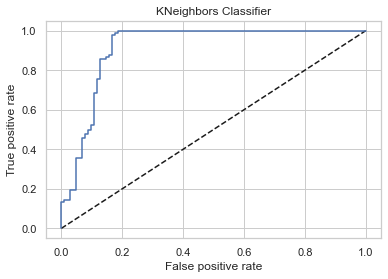

0.8495398159263705

In [106]:
#KNN
predknn_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,predknn_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="KNeighbors Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighbors Classifier')
plt.show()
auc_score=roc_auc_score(y_test,knn.predict(x_test))
auc_score

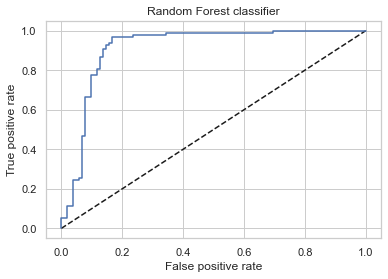

0.8854541816726691

In [108]:
#Random Forest
predrfc_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,predrfc_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random Forest Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest classifier')
plt.show()
auc_score=roc_auc_score(y_test,rfc.predict(x_test))
auc_score

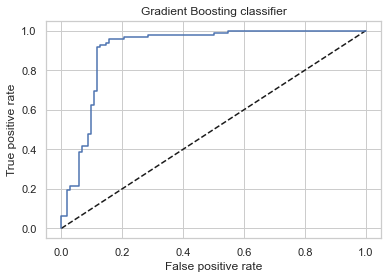

0.8952581032412965

In [109]:
#GradientBoosting
predgb_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,predgb_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Gradient Boosting Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting classifier')
plt.show()
auc_score=roc_auc_score(y_test,gb.predict(x_test))
auc_score

The Random Forest model Accuracy score and Cross validation score is 88.5%. The random forest model isAUC score is 88.54

The Random Forest model gives the best result 

In [110]:
import pickle
filename="Loan Application Prediction.pkl"
pickle.dump(rfc,open(filename, 'wb'))

Conclusion

In [111]:
model=pickle.load(open("Loan Application Prediction.pkl",'rb'))
result=model.score(x_test,y_test)
print('The Accuracy score of the model : ',result*100)

The Accuracy score of the model :  88.5


In [112]:
Accuracy=pd.DataFrame([model.predict(x_test),predrfc],index=['Predicted','Original'])
Accuracy

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Predicted,0,0,1,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,1,1,0
Original,0,0,1,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,1,1,0
